In [1]:
from main import *

Using TensorFlow backend.


In [2]:
lines = []
with open('../input/carnd/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

#images = []
train_samples = []
train_measurements = []
train_marks = []
lines_count = len(lines)
train_lines_count = int(lines_count*0.8)
validation_lines_count = lines_count - train_lines_count
for line in lines[:train_lines_count]:
    # 0 center image, 1 left image, 2 right image, 3 measurement
    measurement = float(line[3])
    for i in range(3):
        current_path = line[i]
        #image = cv2.imread(current_path)
        #images.append(image)
        train_samples.append(current_path)
        factor = 0.0
        if i == 1:
            factor = 0.2
        if i == 2:
            factor = -0.2
        train_measurements.append(measurement + factor)
        train_marks.append(0)
# data augmentation
for i in range(train_lines_count):
    train_samples.append(train_samples[i])
    train_measurements.append(train_measurements[i])
    train_marks.append(1) # 1 for horizontal flipping


validation_samples = []
validation_measurements = []
validation_marks = []
for line in lines[train_lines_count:lines_count]:
    # 0 center image, 1 left image, 2 right image, 3 measurement
    measurement = float(line[3])
    current_path = line[0]
    validation_samples.append(current_path)
    validation_measurements.append(measurement)
    validation_marks.append(0)

#train_samples, validation_samples = train_test_split(samples, test_size=0.2)
#train_measurements, validation_measurements = train_test_split(measurements, test_size=0.2)


# data augmentation
#augmented_images, augmented_measurements = [], []
#for image, measurement in zip(images, measurements):
#    augmented_images.append(image)
#    augmented_measurements.append(measurement)
#    augmented_images.append(cv2.flip(image, 1))
#    augmented_measurements.append(measurement*-1.0)

#X_train = np.array(augmented_images)
#y_train = np.array(augmented_measurements)

#print(len(X_train), len(y_train))







train_generator = generator(train_samples, train_measurements, train_marks)
validation_generator = generator(validation_samples, validation_measurements, validation_marks)


#X_train = preprocess_input(X_train)
model = car_net()
model.summary()

steps_per_epoch = 100
validation_steps = len(validation_samples)

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
h = model.fit_generator(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=validation_generator,
                    validation_steps=validation_steps,
                    nb_epoch=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_1 (Cropping2D)    (None, 65, 320, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 158, 24)       1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 77, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 37, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 35, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 33, 64)         36928     
__________

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:86: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:86: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., epochs=3, validation_data=<generator..., steps_per_epoch=500, validation_steps=1293)`


Epoch 1/3
500/500 [==============================] - 46s 92ms/step - loss: 0.0287 - acc: 0.1572 - val_loss: 0.0161 - val_acc: 0.2546
Epoch 2/3
500/500 [==============================] - 45s 90ms/step - loss: 0.0223 - acc: 0.1605 - val_loss: 0.0216 - val_acc: 0.2528
Epoch 3/3
500/500 [==============================] - 45s 90ms/step - loss: 0.0193 - acc: 0.1606 - val_loss: 0.0233 - val_acc: 0.2527


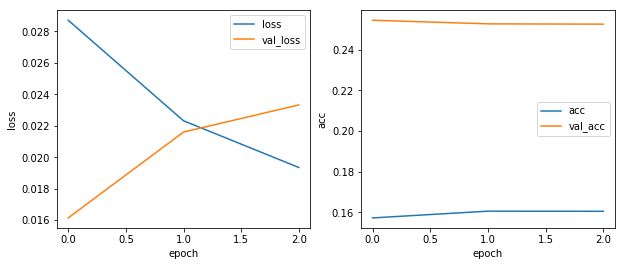

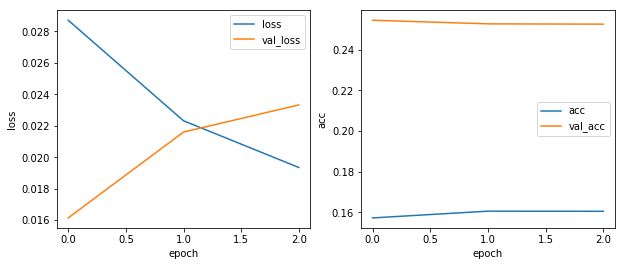

In [5]:
plot_loss_and_accuracy(h.history)

In [4]:
model.save('model.h5')